## Preparação de Dados
Introdução à Ciência de Dados

Aluna: Aurenívia Gomes da Costa


http://agencia.tse.jus.br/estatistica/sead/eleitorado/filiados/uf/filiados_dem_ac.zip

https://dados.gov.br/dataset/filiados-partidos-politicos


In [1]:
"""
* Instalar Bibliotecas Necessárias e Preparar o Ambiente
devido ao dado não estar disponível no momento, utiliza-se o wayback machine
para pegar a ultima versão disponível
"""
%pip install get_wayback_machine 

In [8]:
import requests, zipfile, io, os
import get_wayback_machine
from tqdm.notebook import tqdm # imprimir barra de progresso

# Lista de Partidos e Estados

PARTIDOS = ['dem','pc_do_b','pcb','pco','pdt','phs','pmdb','pmn','pp','ppl',
            'pps','pr','prb','prtb','psb','psc','psd','psdb','psdc','psl',
            'psol','pstu','pt','pt_do_b','ptb','ptc','ptn','pv']

# ESTADOS = ['ac','al','am','ap','ba','ce','df','es','go','ma','mt','ms','mg',
          #  'pa','pb','pr','pe','pi','rj','rn','ro','rs','rr','sc','se','sp',
          #  'to' ]

# para esse momento, escolhido apenas o estado da paraíba
ESTADOS = [ 'pb']

urls = [f'http://agencia.tse.jus.br/estatistica/sead/eleitorado/filiados/uf/filiados_{partido}_pb.zip' \
        for uf in ESTADOS for partido in PARTIDOS]


# Baixar e extrair os dados

acertos, erros = 0,0

for url in tqdm(urls):
  r = get_wayback_machine.get(url)
  if r is not None and r.status_code == 200:
    z = zipfile.ZipFile(io.BytesIO(r.content))\
    .extractall('filiados/')
    acertos += 1;
  else:
    print(f"erro {url}")
    erros += 1;

print(f"arquivos baixados com sucesso {acertos}, erros: {erros}");

# Listar os arquivos.

CAMINHO = '/content/filiados/aplic/sead/lista_filiados/uf/'
arquivos = []

for _, __, files in os.walk(CAMINHO):
  for file in files:
    if file.endswith(".csv"):
      arquivos.append(CAMINHO + file)

print("arquivos extraídos e listados com sucesso");
arquivos


arquivos baixados com sucesso 28, erros: 0
arquivos extraídos e listados com sucesso


['/content/filiados/aplic/sead/lista_filiados/uf/filiados_pv_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/fil_sub_jud_psd_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/fil_sub_jud_pr_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/fil_sub_jud_psc_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/fil_sub_jud_pp_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/filiados_ptc_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/fil_sub_jud_psol_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/fil_sub_jud_pt_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/filiados_psc_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/fil_sub_jud_psdc_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/filiados_psl_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/filiados_psol_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/filiados_ptb_pb.csv',
 '/content/filiados/aplic/sead/lista_filiados/uf/filiados

In [14]:
import pandas as pd # gerar dataframe e mergir

csvs_para_mergir = []

COLUNAS_USADAS = ['SIGLA DO PARTIDO',
       'CODIGO DO MUNICIPIO', 'NOME DO MUNICIPIO', 'ZONA ELEITORAL',
       'SECAO ELEITORAL', 'DATA DA FILIACAO', 'SITUACAO DO REGISTRO',
       'DATA DO PROCESSAMENTO', 'DATA DA DESFILIACAO',
       'DATA DO CANCELAMENTO', 'DATA DA REGULARIZACAO',
       'MOTIVO DO CANCELAMENTO']


DTYPES = {'CODIGO DO MUNICIPIO': 'object',
 'DATA DA DESFILIACAO': 'object',
 'DATA DA FILIACAO': 'object',
 'DATA DA REGULARIZACAO': 'object',
 'DATA DO CANCELAMENTO': 'object',
 'DATA DO PROCESSAMENTO': 'object',
 'MOTIVO DO CANCELAMENTO': 'object',
 'NOME DO MUNICIPIO': 'object',
 'SECAO ELEITORAL': 'object',
 'SIGLA DO PARTIDO': 'object',
 'SITUACAO DO REGISTRO': 'object',
 'UF': 'object',
 'ZONA ELEITORAL': 'object'}

#{'DATA DA REGULARIZACAO': 'object'}

csvs_para_mergir = [pd.read_csv(a, error_bad_lines=False, sep=None, encoding='latin-1', usecols = COLUNAS_USADAS, dtype=DTYPES) for a in arquivos]
filiados_paraiba = pd.concat(csvs_para_mergir, ignore_index=True)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.


In [15]:
filiados_paraiba

,SIGLA DO PARTIDO,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,PV,19674,CACHOEIRA DOS ÍNDIOS,68,20,28/09/2003,REGULAR,14/04/2018,NaN,NaN,NaN,NaN
1,PV,21512,QUEIMADAS,59,121,29/09/2003,REGULAR,14/04/2018,NaN,NaN,NaN,NaN
2,PV,19372,BAYEUX,61,123,29/09/2003,CANCELADO,15/10/2016,27/11/2007,27/11/2007,NaN,Judicial
3,PV,20214,ESPERANÇA,19,99,15/08/2003,REGULAR,18/04/2017,NaN,NaN,NaN,NaN
4,PV,21512,QUEIMADAS,59,95,16/10/1995,REGULAR,14/04/2018,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
476739,PTB,20710,LIVRAMENTO,27,2,03/10/2003,SUB JUDICE,15/04/2016,NaN,NaN,NaN,NaN
476740,PTB,21393,PITIMBU,73,85,04/10/2011,SUB JUDICE,15/04/2016,NaN,NaN,NaN,NaN
476741,PTB,21393,PITIMBU,73,85,04/10/2011,SUB JUDICE,15/04/2016,NaN,NaN,NaN,NaN
476742,PTB,21393,PITIMBU,73,117,04/10/2011,SUB JUDICE,15/04/2016,NaN,NaN,NaN,NaN


In [30]:
filiados_paraiba["SIGLA DO PARTIDO"].value_counts()

PMDB       81961
DEM        50950
PSDB       46543
PT         38801
PP         34416
PTB        31638
PSB        26687
PR         23260
PDT        22060
PRB        13549
PPS        13539
PSD        12552
PSL        11415
PC DO B     9342
PSC         8522
PT DO B     8369
PV          8301
PSDC        6499
PTN         5863
PMN         4946
PHS         4769
PRTB        4332
PTC         4196
PSOL        1770
PPL         1627
PCB          548
PCO          166
PSTU         123
Name: SIGLA DO PARTIDO, dtype: int64

In [ ]:
filiados_paraiba.

In [31]:
contagem_por_partido = filiados_paraiba["SIGLA DO PARTIDO"].value_counts()
# filiados_paraiba["SITUACAO DO REGISTRO"].value_counts().plot.bar()
# filiados_paraiba["NOME DO MUNICIPIO"].value_counts()

print(f"Filiados por partido:\n\
MÉDIA: {round(contagem_por_partido.mean(),2)}\n\
VARIÂNCIA: {round(contagem_por_partido.var(),2)}\n\
DESVIO PADRÃO: {round(contagem_por_partido.std(),2)}\n\
MEDIANA: {round(contagem_por_partido.median(),2)}\n\
MODA: {round(contagem_por_partido.mode()[0],2)}")

Filiados por partido:
MÉDIA: 17026.57
VARIÂNCIA: 367153508.77
DESVIO PADRÃO: 19161.25
MEDIANA: 8932.0
MODA: 123


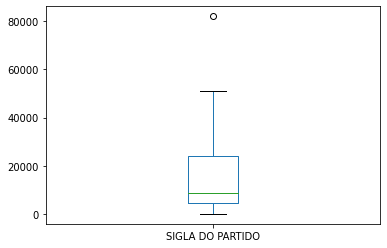

In [33]:
# fazendo boxplot do dado
contagem_por_partido.plot.box()

In [16]:
filiados_paraiba.groupby(by=["SIGLA DO PARTIDO", "NOME DO MUNICIPIO", "SITUACAO DO REGISTRO"]).size().reset_index(name='counts')

,SIGLA DO PARTIDO,NOME DO MUNICIPIO,SITUACAO DO REGISTRO,counts
0,DEM,AGUIAR,CANCELADO,87
1,DEM,AGUIAR,DESFILIADO,3
2,DEM,AGUIAR,REGULAR,104
3,DEM,ALAGOA GRANDE,CANCELADO,124
4,DEM,ALAGOA GRANDE,DESFILIADO,28
...,...,...,...,...
8966,PV,TACIMA,REGULAR,11
8967,PV,TEIXEIRA,CANCELADO,1
8968,PV,TEIXEIRA,REGULAR,27
8969,PV,UIRAÚNA,CANCELADO,26
